<a href="https://colab.research.google.com/github/jonnie763/DATA-690-WANG-Stats-and-Visualizations/blob/master/Jonathan_Rius_Frequency_Table_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Looking at the inflation, classify them according to periods of high inflation (over 5%) and controlled inflation (below 5%), and create a table with the frenquencies of periods of high and controlled inflation.

In [1]:
import matplotlib.pyplot as plt        #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.

import pandas as pd

import numpy as np

import plotly.graph_objects as go

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

import seaborn as sn

plt.rcParams['figure.figsize'] = 25, 12 #Increase general size for matplot.lib

In [46]:
import xlrd

book = xlrd.open_workbook(filename='/content/Inflation.xls')

df_1 = pd.read_excel(book)

df_1

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,Last Updated Date,2024-06-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.00000,1964.000000,1965.000000,...,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
3,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.370290,5.245878,6.571396,6.399343,4.720805,4.653665,7.321106,6.824727,10.883478,7.399186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691,11.580510,4.944227
265,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,...,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672,7.039727,6.073909
267,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.733060,22.020768,10.993204,10.884532


In [3]:
df_new = df.iloc[:, 4:]  # Select all rows, and columns starting from the 5th

print(df_new)

      Unnamed: 4   Unnamed: 5   Unnamed: 6  Unnamed: 7   Unnamed: 8  \
0            NaN          NaN          NaN         NaN          NaN   
1            NaN          NaN          NaN         NaN          NaN   
2    1960.000000  1961.000000  1962.000000  1963.00000  1964.000000   
3            NaN          NaN          NaN         NaN          NaN   
4            NaN          NaN          NaN         NaN          NaN   
..           ...          ...          ...         ...          ...   
264          NaN          NaN          NaN         NaN          NaN   
265          NaN          NaN          NaN         NaN          NaN   
266     1.288859     2.102374     1.246285     1.33797     2.534973   
267          NaN          NaN          NaN         NaN          NaN   
268          NaN          NaN          NaN         NaN          NaN   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  ...  \
0            NaN          NaN          NaN          NaN          NaN  

In [4]:
# Count values greater than 5

count = (df_new> 5).sum()

print(count)

Unnamed: 4      15
Unnamed: 5      16
Unnamed: 6      17
Unnamed: 7      19
Unnamed: 8      21
              ... 
Unnamed: 63     33
Unnamed: 64     43
Unnamed: 65     63
Unnamed: 66    181
Unnamed: 67    121
Length: 64, dtype: int64


In [5]:
# prompt: sum of print count

print(count.sum())


5516


In [6]:
# Count values greater than 5

count = (df_new < 5).sum()

print(count)

Unnamed: 4      56
Unnamed: 5      57
Unnamed: 6      58
Unnamed: 7      56
Unnamed: 8      59
              ... 
Unnamed: 63    193
Unnamed: 64    177
Unnamed: 65    156
Unnamed: 66     36
Unnamed: 67     79
Length: 64, dtype: int64


In [7]:
# prompt: sum of print count

print(count.sum())


5546


In [8]:
import pandas as pd

# Create a dictionary with data
data = {
    'High Inflation': [5516],
    'Controlled Inflation ': [5546],
}

# Create DataFrame
df = pd.DataFrame(data)

df

,High Inflation,Controlled Inflation
0,5516,5546


# **Answer: I did in python, I did a count of a number below and above five and used a dataframe to display the results, they look pretty similar.**

# 2. Follow the procedures proposed in class and in the book (item 2.2 Summarizing Data for a Quantitative Variable) to define the classes for a frequency distribution with quantitative data (Steps 1 to 3).

In [9]:
largest_salary = df_new.max().max()

largest_salary

23773.1317741016

In [10]:
min_salary = df_new.min().min()

min_salary

-17.6404240920371

In [11]:
total_cells = df_new.size

print("Total number of cells:", total_cells)

Total number of cells: 17216


In [12]:
(23773.1317741016--17.6404240920371)/17216


1.3818989427389428

In [38]:
print("Frequency distribution range is 1.3818989427389428, but round to 1.4 ")

Frequency distribution range is 1.3818989427389428, but round to 1.4 


In [13]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 0) & (df_new <= 1.4)).sum()
print(count)
print(count.sum())


Unnamed: 4     17
Unnamed: 5     12
Unnamed: 6     15
Unnamed: 7     11
Unnamed: 8      8
               ..
Unnamed: 63    47
Unnamed: 64    54
Unnamed: 65    16
Unnamed: 66     2
Unnamed: 67     7
Length: 64, dtype: int64
1028


In [14]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 1.4) & (df_new <= 2.8)).sum()
print(count)
print(count.sum())

Unnamed: 4     19
Unnamed: 5     30
Unnamed: 6     17
Unnamed: 7     20
Unnamed: 8     14
               ..
Unnamed: 63    89
Unnamed: 64    47
Unnamed: 65    58
Unnamed: 66     9
Unnamed: 67    18
Length: 64, dtype: int64
1672


In [22]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 2.8) & (df_new <= 4.2)).sum()
print(count)
print(count.sum())

Unnamed: 4     12
Unnamed: 5      8
Unnamed: 6     10
Unnamed: 7     17
Unnamed: 8     27
               ..
Unnamed: 63    36
Unnamed: 64    35
Unnamed: 65    50
Unnamed: 66    10
Unnamed: 67    30
Length: 64, dtype: int64
1574


In [23]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 4.2) & (df_new <= 5.6)).sum()
print(count)
print(count.sum())

Unnamed: 4      3
Unnamed: 5      2
Unnamed: 6     12
Unnamed: 7      6
Unnamed: 8      5
               ..
Unnamed: 63    13
Unnamed: 64    16
Unnamed: 65    38
Unnamed: 66    26
Unnamed: 67    35
Length: 64, dtype: int64
1163


In [24]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 5.6) & (df_new <= 7.0)).sum()
print(count)
print(count.sum())

Unnamed: 4      3
Unnamed: 5      4
Unnamed: 6      6
Unnamed: 7      8
Unnamed: 8      5
               ..
Unnamed: 63     2
Unnamed: 64    10
Unnamed: 65    13
Unnamed: 66    29
Unnamed: 67    32
Length: 64, dtype: int64
924


In [25]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 7.0) & (df_new <= 8.4)).sum()
print(count)
print(count.sum())

Unnamed: 4      4
Unnamed: 5      4
Unnamed: 6      1
Unnamed: 7      2
Unnamed: 8      1
               ..
Unnamed: 63     6
Unnamed: 64     3
Unnamed: 65    13
Unnamed: 66    46
Unnamed: 67    23
Length: 64, dtype: int64
747


In [26]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= 8.4) & (df_new <= 9.8)).sum()
print(count)
print(count.sum())

Unnamed: 4      1
Unnamed: 5      1
Unnamed: 6      2
Unnamed: 7      2
Unnamed: 8      2
               ..
Unnamed: 63     5
Unnamed: 64     3
Unnamed: 65     6
Unnamed: 66    29
Unnamed: 67    18
Length: 64, dtype: int64
640


In [27]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >= -10000000000) & (df_new <= 0)).sum()
print(count)
print(count.sum())

Unnamed: 4      7
Unnamed: 5      6
Unnamed: 6      8
Unnamed: 7      3
Unnamed: 8      8
               ..
Unnamed: 63    15
Unnamed: 64    33
Unnamed: 65     7
Unnamed: 66     1
Unnamed: 67     0
Length: 64, dtype: int64
543


In [28]:
# prompt: Count values between zero and 1.4

# Count values between 0 and 1.4
count = ((df_new >=9.8) & (df_new <= 100000000000)).sum()
print(count)
print(count.sum())

Unnamed: 4      5
Unnamed: 5      6
Unnamed: 6      4
Unnamed: 7      6
Unnamed: 8     10
               ..
Unnamed: 63    13
Unnamed: 64    19
Unnamed: 65    18
Unnamed: 66    65
Unnamed: 67    37
Length: 64, dtype: int64
2771


In [34]:
import pandas as pd

# Create a dictionary with data
data = {
    ' Count: Negative to 0': [543],
    ' Count: Between 0 and 1.4 ': [1028],
    'Count: Between 1.4 and 2.8 ': [1672],
    'Count: Between 2.8 and 4.2 ': [1574],
    'Count: Between 4.2 and 5.6 ': [1163],
    'Count: Between 5.6 and 7.0 ': [924],
    'Count: Between 7.0 and 8.4 ': [747],
    'Count: Between 8.4 and 9.8 ': [543],
    'Count: Between 9.8 and 10000000 ': [2771]

    }

# Create DataFrame
df = pd.DataFrame(data)

df

,Count: Negative to 0,Count: Between 0 and 1.4,Count: Between 1.4 and 2.8,Count: Between 2.8 and 4.2,Count: Between 4.2 and 5.6,Count: Between 5.6 and 7.0,Count: Between 7.0 and 8.4,Count: Between 8.4 and 9.8,Count: Between 9.8 and 10000000
0,543,1028,1672,1574,1163,924,747,543,2771


# **Answer: I used the formula in the book using python and got a range of 1.38. I rounded to get 1.4, and used that range to make the chart. Highest concentation was between 2.8 and 5.6.**

# 3. Plot a scatter plot graph of inflation and unemployment, and add a trendline. Write a single paragraph telling whether you were able to find some evidence of Phillips curve or not.

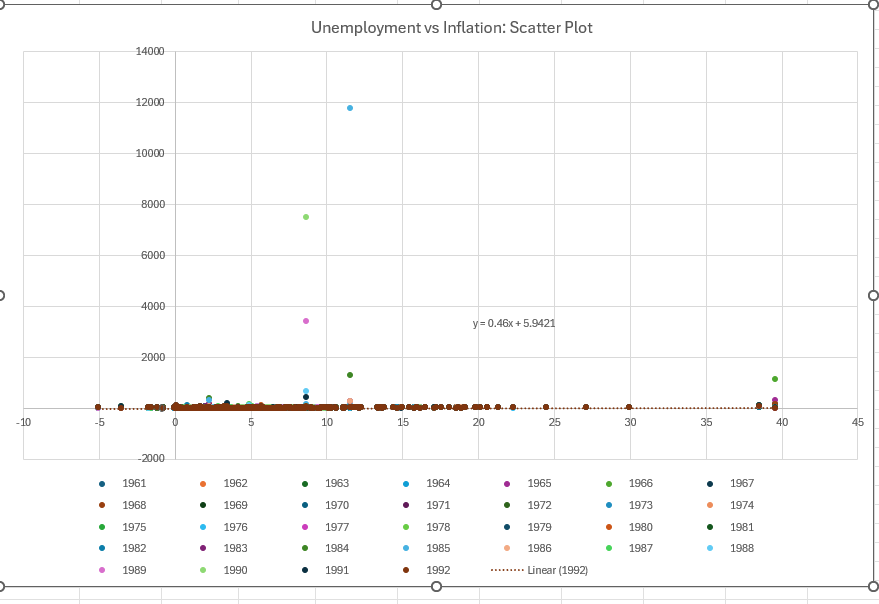

# **Answer: I used excel, to make a trendline because its easier compared to python. The trendline gave a positive slope. I selected all the data including the unemployment rate and inflation and got this data set with a equation that was positive. I am not sure I got this right, but the equation does not show any evidence of the philips curve. Will reevalute later to determine if is true because I think need to change, as is no evidence of philips curve.**